In [1]:
import cv2 # tested with 3.1.0 version
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

# 3. Edge Detection

In [2]:
from skimage.measure import compare_ssim
from evaluate import evaluate
# The code returns the accuracy of the edge detector when compared against the ground truth
# OUTPUT_FILE_PATH: Path of the image containing the edges obtained using edge detector
# GROUND_TRUTH_PATH: Path of the corresponding ground truth image (present in the folder data/ground_truth)
# An example of how to use the evaluate function is shown as follows:
OUTPUT_FILE_PATH = 'data/test.png'
GROUND_TRUTH_PATH = 'data/ground_truth/3096.bmp'
print ('Accuracy: %f' %(evaluate(OUTPUT_FILE_PATH, GROUND_TRUTH_PATH)))

Accuracy: 0.621913


## 3.1 Edge Detector 1 Canny

In [3]:
### Fill your code here
### Report the accuracy obtained
### Report any improvements you have tried

# IMAGES = ['16077.jpg', '14037.jpg', '19021.jpg','24077.jpg']
# f, plots = plt.subplots(4, 2,figsize=(30,20))
# plots= plots.flatten()
# for i in range(len(IMAGES)):
#     imagepath = os.path.join('data/img/', IMAGES[i])
#     image = cv2.imread(imagepath)
#     plots[2*i].imshow(image, cmap='Greys_r')
#     plt.title(imagepath)
#     edges = cv2.Canny(image,150,220)
#     FILENAME = IMAGES[i]
#     OUTPUT_FILE_PATH = os.path.join('data/', IMAGES[i])
#     cv2.imwrite(OUTPUT_FILE_PATH, edges)
#     GROUND_TRUTH_PATH = "data/ground_truth/" + IMAGES[i].replace(".jpg",".bmp")
#     accuracy = evaluate(OUTPUT_FILE_PATH, GROUND_TRUTH_PATH)
#     acc = round(accuracy,2)
#     plots[2*i+1].imshow(edges)
#     plt.title("Canny accuracy: %s" % (acc))
    
    
 

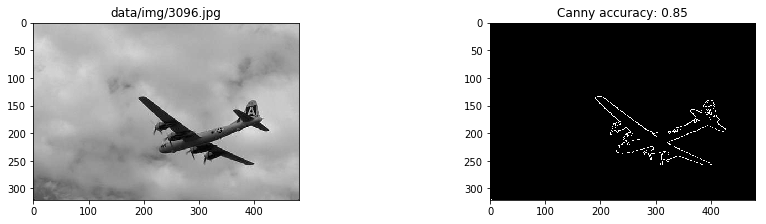

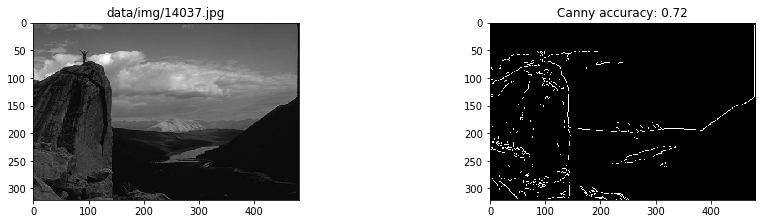

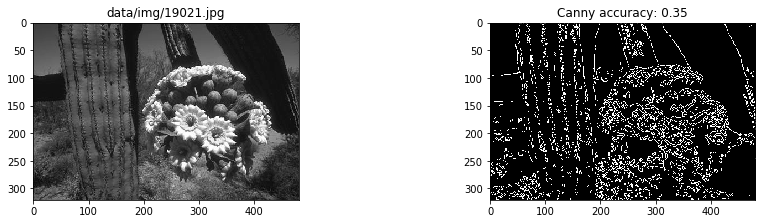

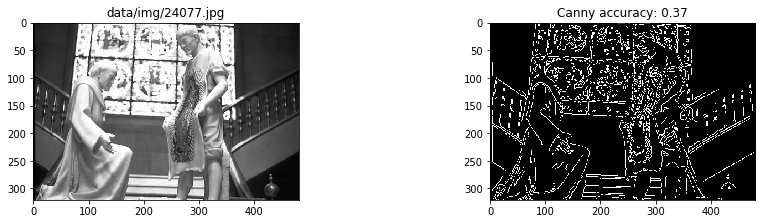

In [4]:
IMAGES = ['3096.jpg', '14037.jpg', '19021.jpg','24077.jpg']
for i in range(len(IMAGES)):
    imagepath = os.path.join('data/img/', IMAGES[i])
    image = cv2.imread(imagepath)
    plt.figure(figsize=(15, 15))
    plt.subplot(4, 2, 2*i+1)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_image, cmap = 'gray')
    plt.title(imagepath)
    edges = cv2.Canny(gray_image,150,220)
    FILENAME = IMAGES[i]
    OUTPUT_FILE_PATH = os.path.join('data/1/', IMAGES[i])
    cv2.imwrite(OUTPUT_FILE_PATH, edges)
    GROUND_TRUTH_PATH = "data/ground_truth/" + IMAGES[i].replace(".jpg",".bmp")
    accuracy = evaluate(OUTPUT_FILE_PATH, GROUND_TRUTH_PATH)
    acc = round(accuracy,2)
    plt.subplot(4, 2, 2*i+2)
    plt.imshow(edges, cmap = 'gray')
    plt.title("Canny accuracy: %s" % (acc))

## 3.2 Edge Detector 2 Structured forests

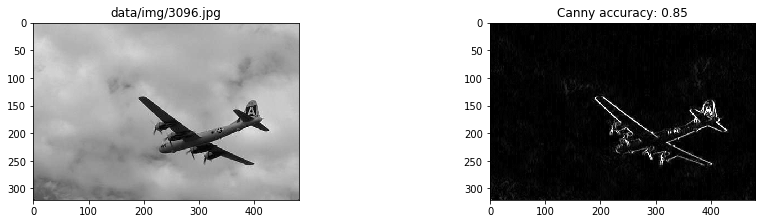

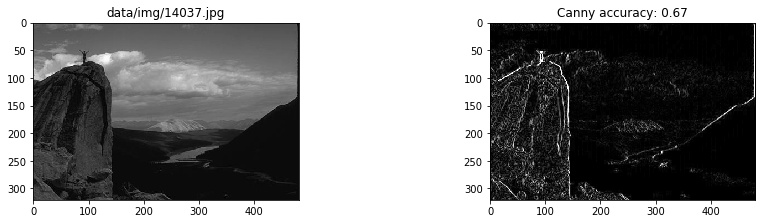

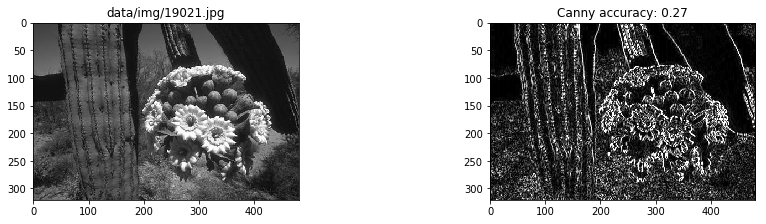

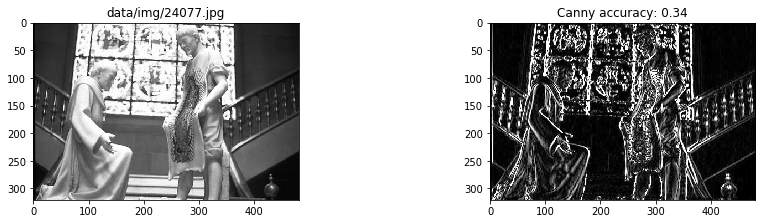

In [9]:
ddepth = cv2.CV_16S
### Fill your code here
### Report the accuracy obtained
### Report any improvements you have tried
IMAGES = ['3096.jpg', '14037.jpg', '19021.jpg','24077.jpg']
for i in range(len(IMAGES)):
    imagepath = os.path.join('data/img/', IMAGES[i])
    image = cv2.imread(imagepath)
    plt.figure(figsize=(15, 15))
    plt.subplot(4, 2, 2*i+1)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_image, cmap = 'gray')
    plt.title(imagepath)
    # Gradient-X
    grad_x = cv2.Sobel(gray_image,cv2.CV_64F,1,0,ksize=3)
    #grad_x = cv2.Scharr(gray,ddepth,1,0)

    # Gradient-Y
    grad_y = cv2.Sobel(gray_image,cv2.CV_64F,1,0,ksize=3)
    #grad_y = cv2.Scharr(gray,ddepth,0,1)
    abs_grad_x = cv2.convertScaleAbs(grad_x)   # converting back to uint8
    abs_grad_y = cv2.convertScaleAbs(grad_y)

    edges = cv2.addWeighted(abs_grad_x,0.5,abs_grad_y,0.5,0)
    FILENAME = IMAGES[i]
    OUTPUT_FILE_PATH = os.path.join('data/2/', IMAGES[i])
    cv2.imwrite(OUTPUT_FILE_PATH, edges)
    GROUND_TRUTH_PATH = "data/ground_truth/" + IMAGES[i].replace(".jpg",".bmp")
    accuracy = evaluate(OUTPUT_FILE_PATH, GROUND_TRUTH_PATH)
    acc = round(accuracy,2)
    plt.subplot(4, 2, 2*i+2)
    plt.imshow(edges, cmap = 'gray')
    plt.title("Canny accuracy: %s" % (acc))



## 3.3 Edge Detector 3

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Doing image  data/img/16077.jpg
Max:  0.24194823764264584  min:  0.0


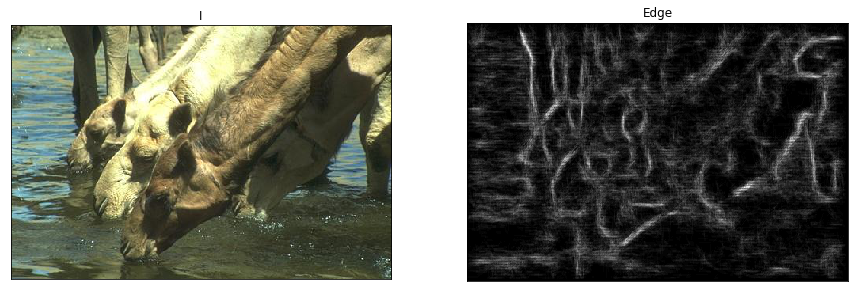

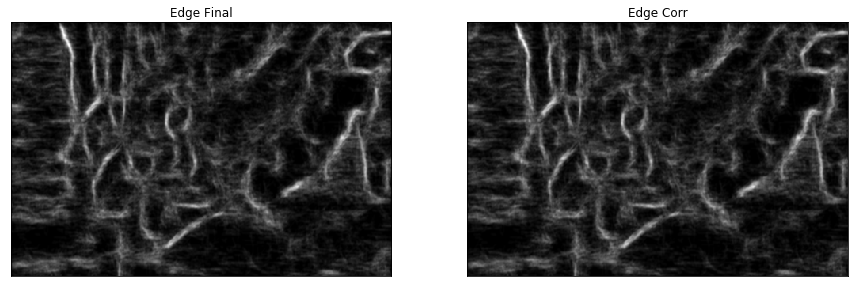

Doing image  data/img/14037.jpg
Max:  0.28652831446379423  min:  0.0


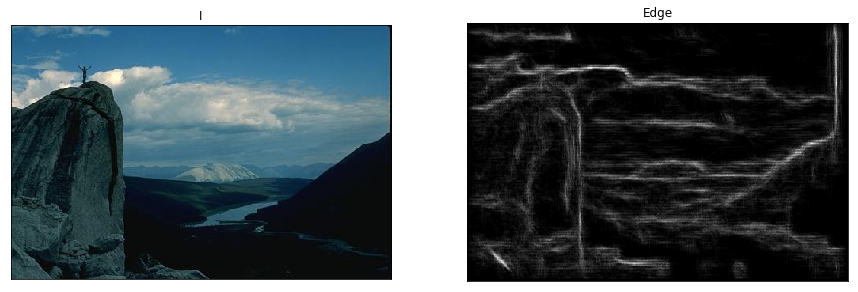

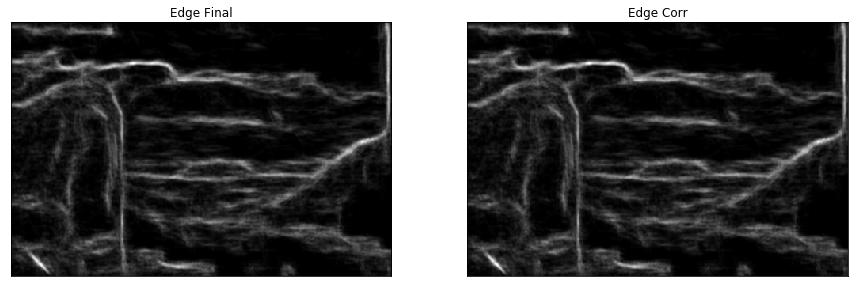

Doing image  data/img/19021.jpg
Max:  0.36393554881215096  min:  0.0


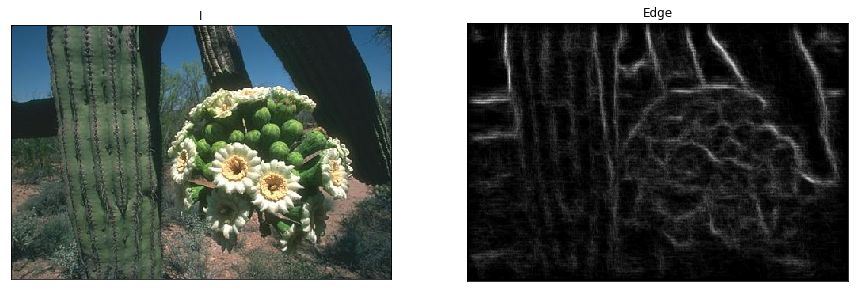

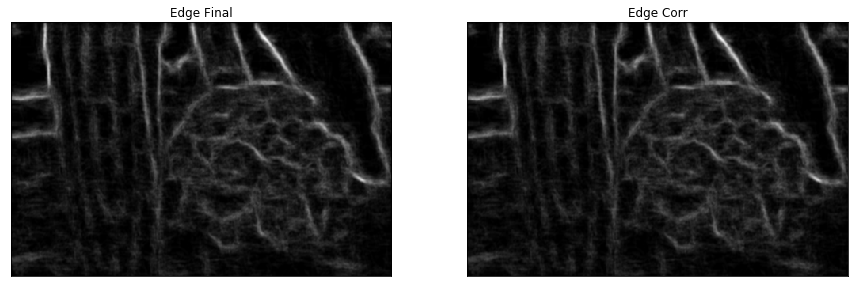

Doing image  data/img/24077.jpg
Max:  0.27639648504555225  min:  0.0


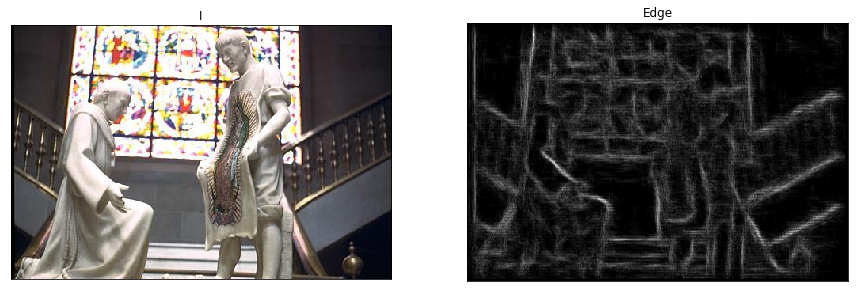

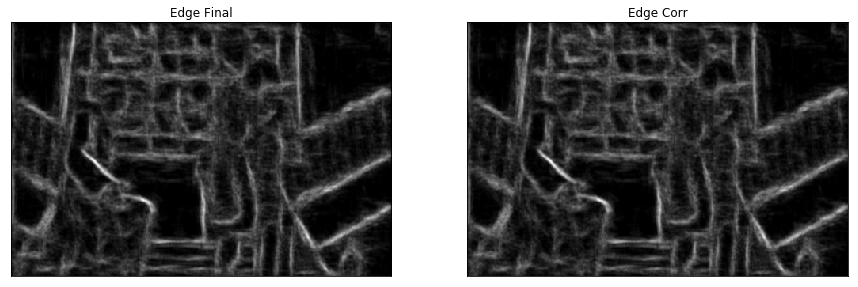

done


In [6]:
### Fill your code here
### Report the accuracy obtained
### Report any improvements you have tried

### Fill your code here
# The code is from github
from PIL import Image;
import sys;
import math;
import numpy as np, h5py;
import cv2;
from matplotlib import pyplot as plt;
import scipy.misc
import os;
import re;
import copy;

from scipy import signal;
from scipy.ndimage.filters import convolve

logfile = open('sim_log.txt', 'w');

def conv(image, r):
    #I = np.array([[100]*20]*20);
    i_pad = impad(image, [r, r, r, r],  np.float32);
    
    SDkernel = np.array([[1/25, 2/25, 3/25, 4/25, 5/25, 4/25, 3/25, 2/25, 1/25]]);
    I_conv = signal.convolve2d(i_pad, SDkernel, mode="valid");
    I_conv = signal.convolve2d(I_conv, SDkernel.transpose(), mode="valid");
    return I_conv;


def impad (image, pad, unit):
    #pi = Image.new('RGB', (image.size[0]+pad[0]+pad[1], image.size[1]+pad[2]+pad[3]), (255, 255, 255));
    if(len(image.shape) == 3):
        pi = np.zeros((image.shape[0]+pad[0]+pad[1],image.shape[1]+pad[2]+pad[3],3), unit);
    else:
        pi = np.zeros((image.shape[0]+pad[0]+pad[1],image.shape[1]+pad[2]+pad[3]), unit) ;
    #pi.paste(image, (pad[0], pad[2]));
    #image_pixel = image.load();
    #pi_pixel = pi.load();
    rs = list(range(image.shape[0])) + list(range((image.shape[0]-1),-1,-1));
    new_rs = [0]*pi.shape[0];
    for i in range(pi.shape[0]):
        new_rs[i] = rs[i-pad[0]];
    
    cs = list(range(image.shape[1])) + list(range((image.shape[1]-1),-1,-1));
    new_cs = [0]*pi.shape[1];
    for i in range(pi.shape[1]):
        new_cs[i] = cs[i-pad[2]];
    for i in range(pi.shape[0]):
        for j in range(pi.shape[1]):
            pi[i,j] = image[new_rs[i], new_cs[j]];

    return pi;

def RGB2LUV (image):
    XYZ = [ np.float32(0.0)]*3;
    LUV = np.array([[[0.0]*3]*image.shape[1]]*image.shape[0]);
    maxu =  np.float32(270.0);
    Ltable = [ np.float32(0.0)]*1064;
    for i in range(1025):
        y =  np.float32(1.0*i/1024.0);
        if (y >  np.float32((6.0/29)*(6.0/29)*(6.0/29))):
            l = 116 *  np.float32(np.double(y**(1/3))) -16;
        else:
            l = y*( np.float32((29.0/3)*(29.0/3)*(29.0/3)));
        
        Ltable[i] = l/maxu;

    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            XYZ[0] = np.float32(0.430574*image[x, y, 2]/255) + np.float32( 0.341550*image[x, y, 1]/255) + np.float32( 0.178325*image[x, y, 0]/255);
            XYZ[1] = np.float32(0.222015*image[x, y, 2]/255) + np.float32( 0.706655*image[x, y, 1]/255) + np.float32( 0.071330*image[x, y, 0]/255);
            XYZ[2] = np.float32(0.020183*image[x, y, 2]/255) + np.float32( 0.129553*image[x, y, 1]/255) + np.float32( 0.939180*image[x, y, 0]/255);
            nowl = np.float32(Ltable[int(XYZ[1]*1024)]);
            LUV[x, y, 0] = np.float32(nowl);
            XYZ[2] = np.float32(1 / (XYZ[0] + (15*XYZ[1] + 3*XYZ[2] + np.float32(10**(-35)))));
            LUV[x, y, 1] = np.float32(np.float32(nowl) * (np.float32(52.0)*XYZ[0]*XYZ[2] - 13.0*0.197833) + 88.0/maxu);
            LUV[x, y, 2] = np.float32(np.float32(nowl) * (np.float32(117.0)*XYZ[1]*XYZ[2] - 13.0*0.468331) + 134.0/maxu);
    return LUV;


def gradient(image, color_cnt):
    GX = np.array([[0.0]*image.shape[1]]*image.shape[0]);
    GY = np.array([[0.0]*image.shape[1]]*image.shape[0]);
    M = np.array([[0.0]*image.shape[1]]*image.shape[0]);
    O = np.array([[0.0]*image.shape[1]]*image.shape[0]);
    left = [0.0]*color_cnt;
    right = [0.0]*color_cnt;
    up = [0.0]*color_cnt;
    down = [0.0]*color_cnt;
    GX_temp = [0.0]*color_cnt;
    GY_temp = [0.0]*color_cnt;
    M_temp = [0.0]*color_cnt;
    for i in range (image.shape[0]): #row
        for j in range (image.shape[1]): #column
            for color in range(color_cnt):
                #if((i == 3) and (j == 1)):
                    #print ("Error");
                if(i == 0):
                    left[color] = 2*image[0, j, color] - image[1, j, color];
                    right[color] = image[1, j, color];
                elif(i == image.shape[0] - 1):
                    left[color] = image[image.shape[0]-2, j, color];
                    right[color] = 2 * image[image.shape[0]-1, j, color] - left[color];
                else:
                    left[color] = image[i-1, j, color];
                    right[color] = image[i+1, j, color];
                if(j == 0):
                    up[color] = 2*image[i, 0, color] - image[i, 1, color];
                    down[color] = image[i, 1, color];
                elif(j == image.shape[1] - 1):
                    up[color] = image[i, image.shape[1]-2, color];
                    down[color] = 2 * image[i, image.shape[1]-1, color] - up[color];
                else:
                    up[color] = image[i, j-1, color];
                    down[color] = image[i, j+1, color];
                GY_temp[color] = ((float)(right[color]) - (float)(left[color])) / 2;
                GX_temp[color] = ((float)(down[color]) - (float)(up[color])) / 2;
                M_temp[color] = math.sqrt(GX_temp[color]**2 + GY_temp[color]**2);
            M[i, j] = max(M_temp);
            GX[i, j] = GX_temp[M_temp.index(max(M_temp))];
            GY[i, j] = GY_temp[M_temp.index(max(M_temp))];

            if(M[i, j] == 0):
                O[i,j] = 0.0;
            else:
                O[i, j] = math.acos(GX[i, j]/M[i,j]);
    return GX, GY, M, O;

def gradQuantize(M, O, number_of_bin, orient, binsize):
    oMult = (float)(orient/math.pi);
    
    oMax=int(orient);

    norm = (float)(1.0/binsize/binsize);
    o = (float)(O)*oMult; # which orient in nOrient
    o0 = int(o); # lower bound
    od = o - o0; # delta
    #o0 *= number_of_bin; # one orient has number_of_bin, so it takes delta * number_of_bin
    if(o0 >= oMax):
        o0 = 0; # overflow
    o1 = o0 + 1; # next one
    if(o1 == oMax):
        o1 = 0; # overflow
    m = float(M) * norm;  #divided by binsize => which bin should it in
    m1 = od*m; # delta
    m0 = m - m1;
    #print(o0, " ", o1, " ", m0, " ", m1);
    return o0, o1, m0, m1;

def gradHist(M, O, binsize, orient):
    global logfile;
    softBin  = 0;
    useHog   = 0;
    clipHog  = 0.2;

    binW = int(M.shape[0] / binsize);
    binH = int(M.shape[1] / binsize);
    #print (binW, " ", binH, file=logfile);
    n_of_bin = binW * binH;
    H = np.array([[[0.0]*orient]*binH]*binW);
    H_prev = np.array([[0.0]*orient]*binW);
    for i in range(binW*binsize):
        if(i == 0):
            init = 0.5 * 1 / binsize - 0.5;
            xb = init;
        hasLf = xb >= 0;
        xb0 = int(xb) if (hasLf) else -1;
        hasRt = xb0 < binW;
        xd = xb - xb0;
        xb = xb + (1 / binsize);
        yb = init; 
        #if(binsize == 1): #no filter
        for j in range(binH*binsize):
            o0, o1, m0, m1 = gradQuantize(M[i, j], O[i, j], n_of_bin, orient, binsize);
            H[int(i/binsize), int(j/binsize), o0] += binsize * m0;
            H[int(i/binsize), int(j/binsize), o1] += binsize * m1;
    return H;

      
def gradientMag(image, radius):

    GX, GY, M, O = gradient(image, 3);
    S = conv(M, radius);

    for i in range (M.shape[0]):
        for j in range (M.shape[1]):
            M[i, j] /= (S[i, j] + 0.01);
    return M, O;

def edgeChns(image, myparam):
    global logfile;
    image_luv = RGB2LUV(image);
    Ishrink = cv2.resize(image_luv, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR);

    k = 0
    chns = [0]*13;
    chns[0], chns[1], chns[2] = cv2.split(Ishrink);
    
    
    k = 3;
    for i in range (2):
    
        s = 2**(i);
        #I1 = Ishrink.copy();
        if(s != myparam.shrink):
            #I1 = cv2.resize(Ishrink, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR);
            I1 = image_luv.copy();
        else:
            I1 = Ishrink.copy();
      

        M, O = gradientMag(I1, 4);
        H = gradHist(M, O, max(1, int(myparam.shrink/s)), myparam.nOrients);
        
        
        if (s != myparam.shrink):
            
            chns[k] = cv2.resize(M, None, fx=s/myparam.shrink, fy=s/myparam.shrink, interpolation=cv2.INTER_LINEAR);
            k += 1;
            H1, H2, H3, H4 = cv2.split(H);
            
            chns[k] = H1; #cv2.resize(H1, None, fx=s/myparam.shrink, fy=s/myparam.shrink, interpolation=cv2.INTER_LINEAR);
            chns[k+1] = H2; #cv2.resize(H2, None, fx=s/myparam.shrink, fy=s/myparam.shrink, interpolation=cv2.INTER_LINEAR);
            chns[k+2] = H3; #cv2.resize(H3, None, fx=s/myparam.shrink, fy=s/myparam.shrink, interpolation=cv2.INTER_LINEAR);
            chns[k+3] = H4; #cv2.resize(H4, None, fx=s/myparam.shrink, fy=s/myparam.shrink, interpolation=cv2.INTER_LINEAR);
            k += 4;
        else:
            
            chns[k] = M;
            k += 1;
            
            chns[k], chns[k+1], chns[k+2], chns[k+3] = cv2.split(H);
            k += 4;
    chnsReg = [0] * 13;
    chnsSim = [0] * 13;
    for i in range(13):
        chnsReg[i] = chns[i];
        chnsSim[i] = conv(chns[i], 4);
        #print ("i: ", i, " ChnsReg: ", chnsReg[i].shape, " , ChnsSim: ", chnsSim[i].shape, file=logfile);
    return chnsReg, chnsSim;

def buildLookup(dims, w):
    n = w*w*dims[2];
    cids = [0]*math.ceil(n);
    n = 0;
    ceilw = math.ceil(w);
    for z in range(dims[2]):
        for c in range(ceilw):
            for r in range(ceilw):
                #cids[n] = z*dims[0]*dims[1] + c*dims[0] + r;
                cids[n] = [r, c, z];
                n = n+1;
    return cids;

def buildLookupSs(chnDims, width, nCells):
    global logfile;
    locs = [0]*1024;
    n = (int)((nCells**2)*((nCells**2)-1)/2*chnDims[2]);
    cids1 = [0]*n;
    cids2 = [0]*n;
    s = int(float(width)/nCells/2.0 + 0.5);
    for i in range(nCells):
        locs[i] = int(float(i+1)*(width+2*s-1)/(nCells+1.0)-s+0.5);
        
    n = 0;
    for z in range(chnDims[2]):
        for i in range(nCells**2):
            for j in range(i+1, nCells**2):
                z1 = int(z);
                #cids1[n] = z1 + locs[int((i-i%nCells)/nCells)]*chnDims[0] + locs[i%nCells];
                cids1[n] = (locs[i%nCells], locs[int((i-i%nCells)/nCells)], z1);
                #cids2[n] = z1 + locs[int((j-j%nCells)/nCells)]*chnDims[0] + locs[j%nCells];
                cids2[n] = (locs[j%nCells], locs[int((j-j%nCells)/nCells)], z1);
                n = n+1;
    return cids1, cids2;

def edgedetection(model, image, chnsReg, chnsSim, myparam):
    global logfile;
    thrs = model.get('model/thrs'); # Get a certain dataset
    thrs = np.array(thrs).ravel();
    fids = model.get('model/fids'); # Get a certain dataset
    fids2d = np.array(fids);
    fids = np.array(fids).ravel();
    child = model.get('model/child'); # Get a certain dataset
    child = np.array(child).ravel();
    segs = model.get('model/segs'); # Get a certain dataset
    segs = np.array(segs).ravel();
    nSegs = model.get('model/nSegs'); # Get a certain dataset
    nSegs = np.array(nSegs).ravel();
    eBins = model.get('model/eBins'); # Get a certain dataset
    eBins = np.array(eBins).ravel();
    eBnds = model.get('model/eBnds'); # Get a certain dataset
    eBnds = np.array(eBnds).ravel();
    
    nBnds = (eBnds.shape[0] -1) / (thrs.shape[0]);

    h = image.shape[0];
    w = image.shape[1];
    Z = image.shape[2];
    nTrees = fids2d.shape[0];
    nTreeNodes = fids2d.shape[1];
    h1 = math.ceil((h-myparam.imWidth) / myparam.stride);
    w1 = math.ceil((w-myparam.imWidth) / myparam.stride);
    h2 = h1*myparam.stride+myparam.gtWidth;
    w2 = w1*myparam.stride+myparam.gtWidth;
    imgDims = [h,w,Z];
    chnDims = [h/myparam.shrink,w/myparam.shrink,myparam.nChns];
    indDims = [h1,w1,myparam.nTreesEval];
    outDims = [h2,w2,1];
    segDims = [myparam.gtWidth,myparam.gtWidth,h1,w1,myparam.nTreesEval];

    nChnFtrs = int(myparam.imWidth*myparam.imWidth*myparam.nChns/myparam.shrink/myparam.shrink);

    iids = buildLookup(imgDims, myparam.gtWidth);
    eids = buildLookup(outDims, myparam.gtWidth);
    cids = buildLookup(chnDims, myparam.imWidth/myparam.shrink);
    cids1, cids2 = buildLookupSs(chnDims, myparam.imWidth/myparam.shrink, myparam.nCells);
    E = np.array([[0]*w2]*h2);
    ind = np.array([[[0]*myparam.nTreesEval]*w1]*h1);
    ns = [0]*100;
    mus = [0]*Z*300;
    E = np.array([[0]*w2]*h2);

    for c in range(w1):
        for t in range(myparam.nTreesEval):
            for r0 in range(2):
                for r in range(r0, h1, 2):
                    #o = int(r*myparam.stride/myparam.shrink
                    #        + (c*myparam.stride/myparam.shrink)*h/myparam.shrink);
                    t1 = ((r+c)%2*myparam.nTreesEval + t)%myparam.nTrees;
                    k = t1*nTreeNodes;
                    while(child[k]):
                        # compute feature
                        f = int(fids[k]);
                        if(f < nChnFtrs):
                            r_temp, c_temp, z_temp = cids[f];
                            ftr = chnsReg[z_temp][r+r_temp, c+c_temp];
                        else:
                            r1_temp, c1_temp, z1_temp = cids1[f-nChnFtrs]; # Should be zero
                            r2_temp, c2_temp, z2_temp = cids2[f-nChnFtrs]; # Should be zero

                            ftr = chnsSim[z1_temp][r + r1_temp, c + c1_temp] - chnsSim[z2_temp][r + r2_temp, c + c2_temp];
                        if(ftr < thrs[k]):
                            k = child[k]-1;
                        else:
                            k = child[k];
                        k += t1*nTreeNodes;
                    ind[r, c, t] = k;
    N = [0] * 4096 *4;
    for c in range(myparam.gtWidth):
        for r in range(myparam.gtWidth):
            # for i in range(4):
            N[(c * myparam.gtWidth + r) * 4    ] = (c-1) * myparam.gtWidth + r if (c > 0) else c * myparam.gtWidth + r; # up
            N[(c * myparam.gtWidth + r) * 4 + 1] = (c+1) * myparam.gtWidth + r if (c < myparam.gtWidth-1) else c * myparam.gtWidth + r; # down
            N[(c * myparam.gtWidth + r) * 4 + 2] = c * myparam.gtWidth + (r-1) if (r > 0) else c * myparam.gtWidth + r; # left
            N[(c * myparam.gtWidth + r) * 4 + 3] = c * myparam.gtWidth + (r+1) if (r < myparam.gtWidth-1) else c * myparam.gtWidth + r; # right

    for c in range(w1):
        for r in range(h1):
            for t in range(myparam.nTreesEval):
                k = ind[r, c, t];
                m = nSegs[k];
                copy_s = [0] * 4096;
                for i in range(4096):
                    copy_s [i] = segs[k*myparam.gtWidth*myparam.gtWidth + i];
                if m == 1:
                    continue;
                for s in range(m):
                    ns[s] = 0;
                    for z in range(Z):
                        mus[s*Z+z] = 0;
                for ci in range(0, myparam.gtWidth, 2):
                    for ri in range(0, myparam.gtWidth, 2):
                        s = copy_s[ci*myparam.gtWidth+ri]; #segs[k*myparam.gtWidth*myparam.gtWidth + ci*myparam.gtWidth+ri];
                        ns[s] += 1;
                        for z in range(Z):
                            mus[s*Z+z] += image[int(r*myparam.stride + (myparam.imWidth-myparam.gtWidth)/2 + ri), int(c*myparam.stride+(myparam.imWidth-myparam.gtWidth)/2 + ci), z];
                for s in range(m):
                    for z in range(Z):
                        if(mus[s*Z+z] == 0):
                            mus[s*Z+z] == 0;
                        else:
                            mus[s*Z+z] /= ns[s];
                b0 = eBnds[int(k*nBnds)];
                b1 = eBnds[int(k*nBnds + myparam.sharpen)];
                for b in range(b0, b1, 1):
                    vs = [0.1] * 10;
                    eBest = 10**10;
                    sBest = -1;
                    ss = [0] * 4;
                    for i in range(4):
                        ss[i] = copy_s[N[eBins[b]*4+i]];#segs[k*myparam.gtWidth*myparam.gtWidth + N[eBins[b]*4+i]];
                    for z in range(Z):
                        [r_t, c_t, z_t] = iids[eBins[b]];
                        #print("r: ", r, " c: ", c, " z: ", z);
                        #print("r_T: ", r_t, " c_t: ", c_t, " z_t: ", z_t);
                        #print("eBins: ", eBins[b], " b: ", b);
                        vs[z] = image[int(r*myparam.stride + (myparam.imWidth-myparam.gtWidth)/2 + r_t), int(c*myparam.stride+(myparam.imWidth-myparam.gtWidth)/2 + c_t), int(z+z_t)];
                    for i in range(4):
                        s == ss[i];
                        if(s == sBest):
                            continue;
                        e = 0;
                        for z in range(Z):
                                d = mus[s*Z+z] - vs[z];
                                e += d**2;
                        if(e < eBest):
                            eBest = e;
                            sBest = s;
                    #if(k*myparam.gtWidth*myparam.gtWidth + eBins[b] == 119770240):
                        #print("something wrong");
                    #segs[k*myparam.gtWidth*myparam.gtWidth + eBins[b]] = sBest;
                    copy_s[eBins[b]] = sBest;

    
                for b in range(b0, b1):
                    i = eBins[b];
                    s = copy_s[i];
                    if(s != copy_s[N[i*4]] or s != copy_s[N[i*4] +1] or s != copy_s[N[i*4] +2] or s != copy_s[N[i*4] +3] ):
                        [r_t, c_t, z_t] = eids[i];
                        E[(r*myparam.stride + r_t), (c*myparam.stride+c_t)] += 1;


    return E;



class MyParam:
    def __init__(self):
        #parameters
        #   (1) model parameters:
        self.imWidth    = 32; #width of image patches
        self.gtWidth    = 16; #width of ground truth patches
        #   (2) tree parameters:
        self.nPos       = 5e5; #number of positive patches per tree
        self.nNeg       = 5e5; #number of negative patches per tree
        self.nImgs      = float("inf"); #maximum number of images to use for training
        self.nTrees     = 8; #number of trees in forest to train        
        self.fracFtrs   = 1/4; #fraction of features to use to train each tree
        self.minCount   = 1; #minimum number of data points to allow split
        self.minChild   = 8; #minimum number of data points allowed at child nodes
        self.maxDepth   = 64; #maximum depth of tree
        self.discretize = 'pca'; #options include 'pca' and 'kmeans'
        self.nSamples   = 256; #number of samples for clustering structured labels
        self.nClasses   = 2; #number of classes (clusters) for binary splits
        self.split      = 'gini'; #options include 'gini', 'entropy' and 'twoing'
        #   (3) feature parameters:
        self.nOrients   = 4; #number of orientations per gradient scale
        self.grdSmooth  = 0; #radius for image gradient smoothing (using convTri)
        self.chnSmooth  = 2; #radius for reg channel smoothing (using convTri)
        self.simSmooth  = 8; #radius for sim channel smoothing (using convTri)
        self.normRad    = 4; #gradient normalization radius (see gradientMag)
        self.shrink     = 2; #amount to shrink channels
        self.nCells     = 5; #number of self similarity cells
        self.nChns      = 13;#number of channels
        self.rgbd       = 0; #0:RGB, 1:depth, 2:RBG+depth (for NYU data only)
        #   (4) detection parameters (can be altered after training):
        self.stride     = 2; #stride at which to compute edges
        self.multiscale = 0; #if true run multiscale edge detector
        self.sharpen    = 2; #sharpening amount (can only decrease after training)
        self.nTreesEval = 4; #number of trees to evaluate per location
        self.nThreads   = 4; #number of threads for evaluation of trees
        self.nms        = 0; #if true apply non-maximum suppression to edges
        #   (5) other parameters:
        self.seed       = 1; #seed for random stream (for reproducibility)
        self.useParfor  = 0; #if true train trees in parallel (memory intensive)

def Edge_detection (image_name):
        
    #I = Image.open("102061.jpg");
    file_name_inp = image_name + '.jpg'
    input_image = os.path.join('data/img',file_name_inp)
    print("Doing image ", input_image);
    I = cv2.imread(input_image);
    model = h5py.File('modelBsds.mat', 'r');
    myparam = MyParam();
    size = I.shape[:2];
    
    stride = max(myparam.stride, myparam.shrink);
    #I_px = I.load();
    p = [int(myparam.imWidth/2), int(myparam.imWidth/2), int(myparam.imWidth/2), int(myparam.imWidth/2)]; #up down left right

    p[1] = int(p[1] + (4-(size[0] + 2*myparam.imWidth/2)%4)%4);
    p[3] = int(p[3] + (4-(size[1] + 2*myparam.imWidth/2)%4)%4);

    new_i = impad(I, p, np.uint8);

    #fxi = open('I.txt', "w");
    #for x in range(10):
        #print (new_i[x, 0:9, :], file=fxi);
    #fxi.close();

    chnsReg, chnsSim = edgeChns(new_i, myparam);
    if(myparam.sharpen != 0):
        image_luv = RGB2LUV(new_i);
        luv_pad = impad(image_luv, [1, 1, 1, 1],  np.float32);

        SDkernel = np.array([[1/4, 2/4, 1/4]]);
        l_pad, u_pad, v_pad = cv2.split(luv_pad);
        #luv_conv = signal.convolve2d(luv_pad, SDkernel, mode="valid");
        l_conv = signal.convolve2d(l_pad, SDkernel, mode="valid");
        u_conv = signal.convolve2d(u_pad, SDkernel, mode="valid");
        v_conv = signal.convolve2d(v_pad, SDkernel, mode="valid");
        #luv_conv = signal.convolve2d(luv_conv, SDkernel.transpose(), mode="valid");
        l_conv = signal.convolve2d(l_conv, SDkernel.transpose(), mode="valid");
        u_conv = signal.convolve2d(u_conv, SDkernel.transpose(), mode="valid");
        v_conv = signal.convolve2d(v_conv, SDkernel.transpose(), mode="valid");
        luv_conv = cv2.merge((l_conv, u_conv, v_conv));


    E = edgedetection(model, luv_conv, chnsReg, chnsSim, myparam);
    
    file_name_out = image_name + '_forest.png'
    
    #cv2.imwrite('.\\Output\\' + image_name + 'Edge.jpg', E);
    cv2.imwrite(os.path.join('data/prob3_output',file_name_out),E)
    
    
    t = (float)(myparam.stride**2)/(myparam.gtWidth**2)/myparam.nTreesEval * 1.66;
    r = int(myparam.gtWidth/2)
    
    new_E = np.array([[0.0]*I.shape[1]]*I.shape[0]);

    for row in range(I.shape[0]):
        for column in range(I.shape[1]):
            new_E[row, column] = float(E[row + r, column + r])*t;

    E_pad = impad(new_E, [1, 1, 1, 1],  np.float32);
    SDkernel = np.array([[1/4, 2/4, 1/4]]);
    E_conv = signal.convolve2d(E_pad, SDkernel, mode="valid");
    E_final = signal.convolve2d(E_conv, SDkernel.transpose(), mode="valid");

    i_E_corr = np.array([[0.0]*E_final.shape[1]]*E_final.shape[0]);
    E_corr = np.array([[0.0]*E_final.shape[1]]*E_final.shape[0]);
    E_thres = np.array([[0.0]*E_final.shape[1]]*E_final.shape[0]);
    strong_I = np.array([[[0.0]*I.shape[2]]*I.shape[1]]*I.shape[0]);
    edge_I = np.array([[[0.0]*I.shape[2]]*I.shape[1]]*I.shape[0]);
    edge_I = copy.deepcopy(I);
    
    
    max_num = 0.0;
    min_num = 255.0;

    max_color = [0]*I.shape[2];
    min_color = [255]*I.shape[2];

    for row in range(E_final.shape[0]):
        for column in range(E_final.shape[1]):
            #E_final[row, column] = 255 - 255*E_final[row, column];
            for color in range(I.shape[2]):
                strong_I[row, column, color] = int(I[row, column, color]);
                if(max_color[color] < I[row, column, color]):
                    max_color[color] = I[row, column, color];
                if(min_color[color] > I[row, column, color]):
                    min_color[color] = I[row, column, color];
            if(max_num < E_final[row, column]):
                max_num = E_final[row, column];
            if(min_num > E_final[row, column]):
                min_num = E_final[row, column];
    
    delta = float(max_num - min_num) / 3;
    alpha = 512;
    print ("Max: ", max_num, " min: ", min_num)    ;
    for row in range(E_final.shape[0]):
        for column in range(E_final.shape[1]):
            E_corr[row, column] = (int)(255 * (float(E_final[row, column]) - min_num)  / (max_num-min_num));
            i_E_corr[row, column] = 255 - E_corr[row, column];
            E_thres[row, column] = 255 if (E_final[row, column] > delta) else 0;

            for color in range(I.shape[2]):
                if(row == 0):
                    up = (int)(strong_I[row, column, color]);
                    down = (int)(strong_I[row+1, column, color]);
                    deltav = 1;
                    strong_I[row, column, color] =  (int)(min(max_color[color], max(min_color[color], up + (up - down) * 2 / deltav * E_corr[row, column] / alpha)));
                    strong_I[row+1, column, color] =  (int)(min(max_color[color], max(min_color[color], down + (down - up) * 2 / deltav * E_corr[row, column] / alpha)));
                    if(E_final[row, column] > delta):
                        edge_I[row, column, color] = 255;
                        edge_I[row+1, column, color] = 255;
                elif(row == I.shape[0]-1):
                    up = (int)(strong_I[row-1, column, color]);
                    down = (int)(strong_I[row, column, color]);
                    deltav = 1;
                    strong_I[row-1, column, color] =  (int)(min(max_color[color], max(min_color[color], up + (up - down) * 2 / deltav * E_corr[row, column] / alpha)));
                    strong_I[row, column, color] = (int)(min(max_color[color], max(min_color[color],  down + (down - up) * 2 / deltav * E_corr[row, column] / alpha)));
                    if(E_final[row, column] > delta):
                        edge_I[row-1, column, color] = 255;
                        edge_I[row, column, color] = 255;
                else:
                    up = (int)(strong_I[row-1, column, color]);
                    down = (int)(strong_I[row+1, column, color]);
                    deltav = 2;
                    strong_I[row-1, column, color] =  int(min(max_color[color], max(min_color[color], up + (up - down) * 2 / deltav * E_corr[row, column] / alpha)));
                    strong_I[row+1, column, color] =  int(min(max_color[color], max(min_color[color], down + (down - up) * 2 / deltav * E_corr[row, column] / alpha)));
                    if(E_final[row, column] > delta):
                        edge_I[row-1, column, color] = 255;
                        edge_I[row, column, color] = 255;
                        edge_I[row+1, column, color] = 255;
                if(column == 0):
                    left = (int)(strong_I[row, column, color]);
                    right = (int)(strong_I[row, column+1, color]);
                    deltah = 1;
                    strong_I[row, column, color] =  int(min(max_color[color], max(min_color[color], left + (left - right) * 2 / deltah * E_corr[row, column] / alpha)));
                    strong_I[row, column+1, color] =  int(min(max_color[color], max(min_color[color], right + (right - left) * 2 / deltah * E_corr[row, column] / alpha)));
                    if(E_final[row, column] > delta):
                        edge_I[row, column, color] = 255;
                        edge_I[row, column+1, color] = 255;
                elif(column == I.shape[1]-1 ):
                    left = (int)(strong_I[row, column-1, color]);
                    right = (int)(strong_I[row, column, color]);
                    deltah = 1;
                    strong_I[row, column-1, color] =  int(min(max_color[color], max(min_color[color], left + (left - right) * 2 / deltah * E_corr[row, column] / alpha)));
                    strong_I[row, column, color] =  int(min(max_color[color], max(min_color[color], right + (right - left) * 2 / deltah * E_corr[row, column] / alpha)));
                    if(E_final[row, column] > delta):
                        edge_I[row, column-1, color] = 255;
                        edge_I[row, column, color] = 255;
                else:
                    left = int(strong_I[row, column-1, color]);
                    right = int(strong_I[row, column+1, color]);
                    deltah = 2;
                    strong_I[row, column-1, color] =  int(min(max_color[color], max(min_color[color], left + (left - right) * 2 / deltah * E_corr[row, column] / alpha)));
                    strong_I[row, column+1, color] =  int(min(max_color[color], max(min_color[color], right + (right - left) * 2 / deltah * E_corr[row, column] / alpha)));
                    if(E_final[row, column] > delta):
                        edge_I[row, column-1, color] = 255;
                        edge_I[row, column, color] = 255;
                        edge_I[row, column+1, color] = 255;
                
    
    E_file = h5py.File('image_name' + 'output_edge.mat', 'w');
    E_file.create_dataset('edge', data=E_final);
    E_file.close();

    cv2.imwrite('data/prob3_output/' + image_name+'_Edge_final.jpg', E_corr);
    cv2.imwrite('data/prob3_output/' + image_name+'_Edge_corr.jpg', i_E_corr);
    cv2.imwrite('data/prob3_output/' + image_name+'_Edge_thres.jpg', E_thres);
    cv2.imwrite('data/prob3_output/' + image_name+'_Edge_enhan.jpg', strong_I);
    cv2.imwrite('data/prob3_output/' + image_name+'_Edge_wide.jpg', edge_I);
    
    plt.figure(figsize=(15, 15))
    plt.subplot(1,2,1),plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB));
    plt.title('I'), plt.xticks([]), plt.yticks([]);
    
    plt.subplot(1,2,2),plt.imshow(E, cmap='gray');
    plt.title('Edge'), plt.xticks([]), plt.yticks([]);
    
    plt.figure(figsize=(15, 15))
    plt.subplot(1,2,1),plt.imshow(E_final, cmap='gray');
    plt.title('Edge Final'), plt.xticks([]), plt.yticks([]);
    
    plt.subplot(1,2,2),plt.imshow(E_corr, cmap='gray');
    plt.title('Edge Corr'), plt.xticks([]), plt.yticks([]);
    plt.show()
    
    
        
name_lst = ['16077','14037','19021','24077']

#files = [f[:-4] for f in os.listdir('.\\Input\\') if re.match(r'.*\.jpg', f)];




for idx in range(len(name_lst)):
    file_name_inp = name_lst[idx]
    Edge_detection(file_name_inp);
    
print('done')   


In [13]:
IMAGES = ['16077.jpg', '14037.jpg', '19021.jpg','24077.jpg']
for i in range(len(IMAGES)):
    GROUND_TRUTH_PATH = "data/ground_truth/" + IMAGES[i].replace(".jpg",".bmp")
    OUTPUT_FILE_PATH = 'data/prob3_output/' + IMAGES[i][:-4]+'_Edge_final.jpg'
    accuracy = evaluate(OUTPUT_FILE_PATH, GROUND_TRUTH_PATH)
    print ('accuracy of the picture '+IMAGES[i])
    print (accuracy)

accuracy of the picture 16077.jpg
0.7496583571349926
accuracy of the picture 14037.jpg
0.7397879547412257
accuracy of the picture 19021.jpg
0.8184014352238651
accuracy of the picture 24077.jpg
0.5519782902960473
